# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.154620e+01     7.579401e+00
 * time: 0.0033111572265625
     1     2.933453e+01     4.774035e+00
 * time: 0.01488804817199707
     2     2.082167e+01     4.886118e+00
 * time: 0.029284000396728516
     3     1.574117e+01     4.306777e+00
 * time: 0.04305100440979004
     4     1.196218e+01     2.046568e+00
 * time: 0.05736899375915527
     5     1.190858e+01     2.732138e+00
 * time: 0.0689229965209961
     6     1.081866e+01     1.777384e+00
 * time: 0.08048605918884277
     7     9.796673e+00     1.911981e+00
 * time: 0.09205102920532227
     8     9.321957e+00     1.585835e+00
 * time: 0.10365700721740723
     9     9.052995e+00     1.613315e+00
 * time: 0.1151421070098877
    10     8.765708e+00     1.242230e+00
 * time: 0.1267380714416504
    11     8.456011e+00     8.263802e-01
 * time: 0.13818812370300293
    12     8.241002e+00     4.290178e-01
 * time: 0.15023112297058105
    13     8.174701e+00     8.069725e-01
 * time: 0.

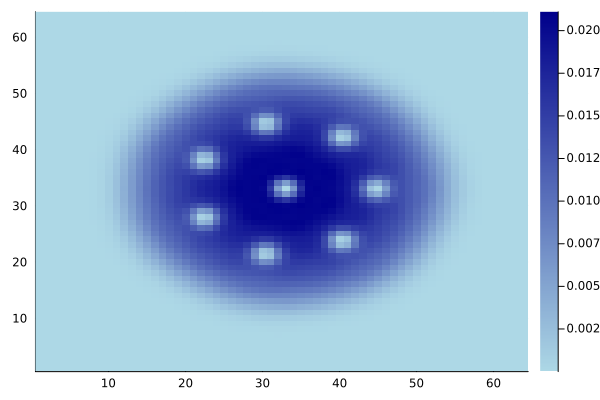

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)